In [38]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.models import load_model
import cv2
import io

In [15]:
class MyLayer :
    def __init__(self, unit ) :
        self.unit = unit
        print('unit ', unit)
        print("hello")
        
    def test(self, v) :
        print(v)                   
        
    def __call__(self, v) :
        print(self.unit, v)        
        return self
        
        
#A = MyLayer()
#A.test(10)
#A(20)

#A = MyLayer()(20)
# A = MyLayer()
# A(20)

#A = MyLayer(20)([1,2,3,4,5])
A = MyLayer(20)
A([1,2,3,4,5])
A([3,3,4])

B = MyLayer(50)
C = MyLayer(50)


unit  20
hello
20 [1, 2, 3, 4, 5]
20 [3, 3, 4]
unit  50
hello
unit  50
hello


In [41]:
from sklearn.datasets import fetch_olivetti_faces
import cv2

orl = fetch_olivetti_faces()
data = orl.data
target = orl.target
print(data)
print(target)
print(target.shape)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18

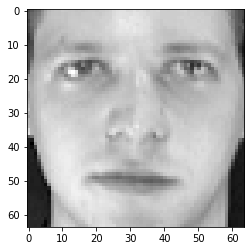

In [3]:
plt.imshow(data[0,:].reshape(64,64), cmap='gray')

In [42]:
data = np.zeros((400, 28*28), dtype = 'uint8')

for i, d in enumerate(orl.data):
    image = cv2.resize(d.reshape(64,64),(28,28))
    data[i,:] = image.flatten()*255

In [5]:
print(data.shape)

(400, 784)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(data,target,test_size=0.2)

print(X_train.shape)
print(X_val.shape)

(320, 784)
(80, 784)


In [7]:
X_train = X_train.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_train = X_train/255
X_val = X_val/255

y_train_e = to_categorical(y_train,40)
y_val_e = to_categorical(y_val,40)

In [8]:
print(X_train.shape)
print(y_train_e.shape)

(320, 28, 28, 1)
(320, 40)


In [9]:
model = Sequential()

input_shape=(28,28,1)

model.add(Conv2D(16, input_shape=input_shape, kernel_size= (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size= (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu')) 
model.add(Dense(40, activation = 'softmax')) 


model.compile(loss = 'categorical_crossentropy', optimizer ='adam', 
              metrics = ['accuracy']) 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                5

In [11]:
hist = model.fit(x = X_train, y = y_train_e,
                 epochs = 40, 
                 verbose = 1,
                 batch_size=100)

Epoch 1/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6971 - accuracy: 0.0188
Epoch 2/40
4/4 [==============================] - 0s 19ms/step - loss: 3.6755 - accuracy: 0.0281
Epoch 3/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6676 - accuracy: 0.0312
Epoch 4/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6588 - accuracy: 0.0312
Epoch 5/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6519 - accuracy: 0.0406
Epoch 6/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6426 - accuracy: 0.0562
Epoch 7/40
4/4 [==============================] - 0s 19ms/step - loss: 3.6302 - accuracy: 0.0594
Epoch 8/40
4/4 [==============================] - 0s 19ms/step - loss: 3.6185 - accuracy: 0.0437
Epoch 9/40
4/4 [==============================] - 0s 20ms/step - loss: 3.6056 - accuracy: 0.0312
Epoch 10/40
4/4 [==============================] - 0s 20ms/step - loss: 3.5888 - accuracy: 0.0562
Epoch 11/40
4/4 [============

In [12]:
score = model.evaluate(X_val, y_val_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9422639012336731
Test accuracy: 0.7875000238418579


In [13]:
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dense_1


In [14]:
W = model.layers[0].get_weights()
print(len(W))
print(W[0].shape)
print(W[1].shape)

2
(3, 3, 1, 16)
(16,)


In [16]:
filters = W[0]

f1 = filters[:,:,0,0]
print(f1)

f2 = filters[:,:,0,1]
print(f2)


[[-0.02742709  0.29020914  0.18532854]
 [ 0.25317296  0.12848602  0.02775916]
 [ 0.21838082  0.25158408  0.18133457]]
[[ 0.07691827  0.13829947  0.33445406]
 [-0.12244373  0.16457458  0.22485931]
 [-0.24580052  0.09526828  0.13404293]]


In [17]:
W2 = model.layers[2].get_weights()
filters = W[0]
print(filters.shape)

(3, 3, 1, 16)


In [18]:
f1 = filters[:,:,0,0]
print(f1)

[[-0.02742709  0.29020914  0.18532854]
 [ 0.25317296  0.12848602  0.02775916]
 [ 0.21838082  0.25158408  0.18133457]]


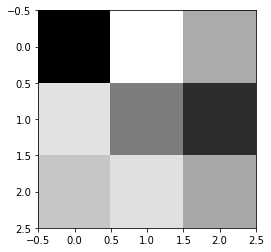

In [19]:
plt.imshow(f1, cmap='gray')

In [29]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same',
                     activation='relu',input_shape=input_shape, name="conv1_1"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu')) 
model.add(Dense(40, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_3 (Dense)              (None, 40)               

In [30]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=40,
                        verbose=2,
                        validation_data=(X_val, y_val_e ))

Epoch 1/40
16/16 - 0s - loss: 3.7315 - accuracy: 0.0125 - val_loss: 3.7051 - val_accuracy: 0.0125
Epoch 2/40
16/16 - 0s - loss: 3.6721 - accuracy: 0.0750 - val_loss: 3.6962 - val_accuracy: 0.0375
Epoch 3/40
16/16 - 0s - loss: 3.6429 - accuracy: 0.0781 - val_loss: 3.6966 - val_accuracy: 0.0125
Epoch 4/40
16/16 - 0s - loss: 3.5587 - accuracy: 0.1406 - val_loss: 3.6297 - val_accuracy: 0.0375
Epoch 5/40
16/16 - 0s - loss: 3.4271 - accuracy: 0.1594 - val_loss: 3.4135 - val_accuracy: 0.1250
Epoch 6/40
16/16 - 0s - loss: 3.1080 - accuracy: 0.3219 - val_loss: 3.0122 - val_accuracy: 0.2125
Epoch 7/40
16/16 - 0s - loss: 2.5909 - accuracy: 0.4688 - val_loss: 2.3991 - val_accuracy: 0.5000
Epoch 8/40
16/16 - 0s - loss: 1.9339 - accuracy: 0.6187 - val_loss: 1.9230 - val_accuracy: 0.5625
Epoch 9/40
16/16 - 0s - loss: 1.3756 - accuracy: 0.7125 - val_loss: 1.3209 - val_accuracy: 0.7625
Epoch 10/40
16/16 - 0s - loss: 0.7939 - accuracy: 0.8656 - val_loss: 0.8767 - val_accuracy: 0.8125
Epoch 11/40
16/16 -

In [31]:
from keras.models import Model

model2 = Model(inputs=model.inputs, outputs = model.layers[0].output)

I = X_train[0:1,:,:,:]
print(I.shape)

(1, 28, 28, 1)


In [32]:
feature_maps = model2.predict(I)
print(feature_maps.shape)

(1, 28, 28, 16)


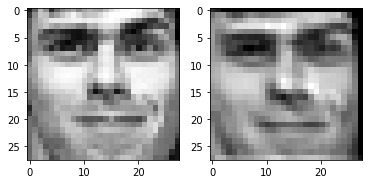

In [33]:
img = feature_maps[0,:,:,1]

plt.subplot(121)
plt.imshow(I[0,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

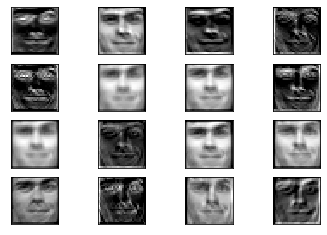

In [34]:
for ix in range(16):
    ax = plt.subplot(4,4,ix+1)
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [35]:
model3 = Model(inputs=model.inputs, outputs = model.layers[2].output)

I = X_train[187:188,:,:,:]
feature_maps = model3.predict(I)
print(feature_maps.shape)

(1, 14, 14, 32)


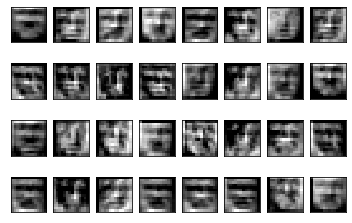

In [37]:
for ix in range(32):
    ax = plt.subplot(4,8,ix+1)
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [49]:
data = np.zeros((400, 32*32), dtype = 'uint8')

for i, d in enumerate(orl.data):
    image = cv2.resize(d.reshape(64,64),(32,32))
    data[i,:] = image.flatten()*255

X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)



X_train = X_train.reshape(-1, 32, 32, 1)/255.0
X_val = X_val.reshape(-1, 32, 32, 1)/255.0
y_train_e = to_categorical(y_train, 40)
y_val_e = to_categorical(y_val, 40)

In [50]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(40, activation='softmax'))
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)       

In [51]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val_e ))
model.evaluate(X_val, y_val_e)

Epoch 1/50
16/16 [==============================] - 1s 34ms/step - loss: 1.9777 - accuracy: 0.5531 - val_loss: 3.6093 - val_accuracy: 0.0500
Epoch 2/50
16/16 [==============================] - 0s 29ms/step - loss: 0.1306 - accuracy: 0.9937 - val_loss: 3.8990 - val_accuracy: 0.0375
Epoch 3/50
16/16 [==============================] - 0s 29ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.5250 - val_accuracy: 0.0375
Epoch 4/50
16/16 [==============================] - 1s 31ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 5.1452 - val_accuracy: 0.0375
Epoch 5/50
16/16 [==============================] - 1s 33ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 5.7545 - val_accuracy: 0.0375
Epoch 6/50
16/16 [==============================] - 1s 39ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 6.3402 - val_accuracy: 0.0375
Epoch 7/50
16/16 [==============================] - 1s 36ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 6.8231 - val_accuracy: 0.0375
Epoch 8/50
16

[0.026904577389359474, 1.0]

## fashion mnist

In [52]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
X_train = X_train / 255
X_test = X_test / 255

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


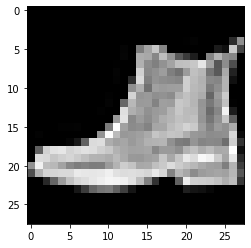

In [53]:
plt.imshow(X_train[606,:,:,0], cmap='gray')

In [54]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
history = model.fit(X_train, y_train_e, 
                    batch_size = 100, epochs = 1, verbose = 1)

600/600 [==============================] - 69s 116ms/step - loss: 1.2457 - accuracy: 0.6965


In [56]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
history = model.fit(X_train, y_train_e, 
                    batch_size = 100, epochs = 1, verbose = 1)

600/600 [==============================] - 84s 140ms/step - loss: 2.3804 - accuracy: 0.0990
